# Pandas III + Intro to Plotting

### Sneak peak:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')
plt.rcParams['figure.figsize'] = (12, 6)

In [6]:
df = pd.read_csv('data/beer_subset.csv.gz', parse_dates=['time'], compression='gzip')
review_cols = [c for c in df.columns if c[0:6] == 'review']
df.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


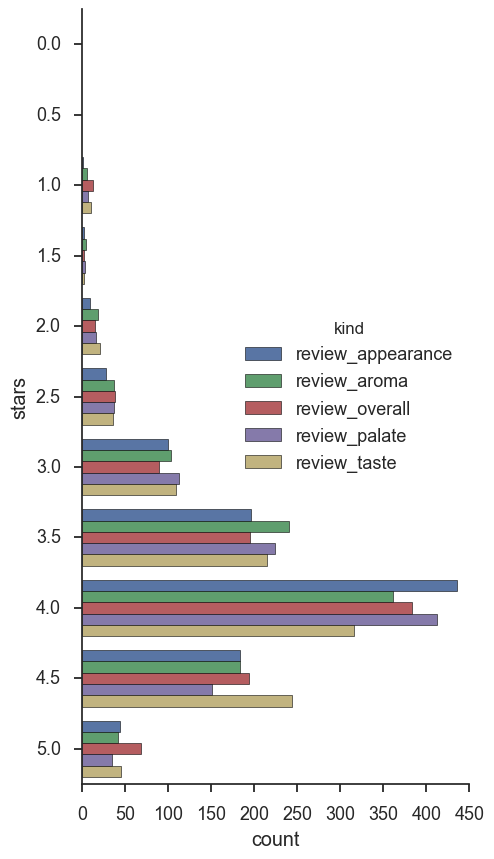

In [7]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.countplot(hue='kind', y='stars', data=(df[review_cols]
                                           .stack()
                                           .rename_axis(['record', 'kind'])
                                           .rename('stars')
                                           .reset_index()),
              ax=ax, order=np.arange(0, 5.5, .5))
sns.despine()

### Groupby

The components of a groupby operation are to

1. Split a table into groups
2. Apply a function to each group
3. Combine the results

In pandas the first step looks like

```python
df.groupby( grouper )
```

`grouper` can be many things

- Series (or string indicating a column in `df`)
- function (to be applied on the index)
- dict : groups by *values*
- `levels=[ names of levels in a MultiIndex ]`

In [8]:
gr = df.groupby('beer_style')
gr

Haven't really done anything yet. Just some book-keeping to figure out which **keys** go with which **rows**. Keys are the things we've grouped by (each `beer_style` in this case).

In [ ]:
gr.

In [12]:
gr.groups

{'Altbier': [200, 960],
 'American Adjunct Lager': [31,
  36,
  80,
  203,
  234,
  258,
  280,
  349,
  435,
  442,
  453,
  457,
  520,
  612,
  626,
  650,
  784,
  792,
  812,
  817,
  831,
  849],
 'American Amber / Red Ale': [6,
  65,
  68,
  103,
  111,
  127,
  164,
  188,
  206,
  220,
  243,
  278,
  419,
  433,
  483,
  641,
  688,
  763,
  797,
  798,
  877,
  894,
  895,
  911,
  932,
  977,
  986],
 'American Amber / Red Lager': [30, 50, 120, 253, 566, 570, 729, 874],
 'American Barleywine': [132,
  146,
  335,
  410,
  455,
  569,
  654,
  691,
  709,
  748,
  749,
  751,
  755,
  757,
  758,
  759,
  762,
  767,
  774,
  781,
  782,
  785,
  793,
  805],
 'American Black Ale': [66, 970],
 'American Blonde Ale': [85, 244, 250, 383, 402, 489, 557, 846, 888, 903],
 'American Brown Ale': [27,
  69,
  388,
  429,
  480,
  493,
  512,
  571,
  833,
  844,
  845,
  866,
  918,
  981,
  994,
  996],
 'American Double / Imperial IPA': [3,
  16,
  37,
  38,
  92,
  94,
  100,
  1

In [15]:
gr.groups.keys()

dict_keys(['Extra Special / Strong Bitter (ESB)', 'Munich Helles Lager', 'Faro', 'English Brown Ale', 'Lambic - Unblended', 'Rye Beer', 'California Common / Steam Beer', 'Euro Strong Lager', 'Euro Pale Lager', 'Rauchbier', 'Märzen / Oktoberfest', 'Oatmeal Stout', 'American Adjunct Lager', 'German Pilsener', 'English Dark Mild Ale', 'American Amber / Red Lager', 'Witbier', 'Munich Dunkel Lager', 'American Porter', 'Milk / Sweet Stout', 'English India Pale Ale (IPA)', 'American Wild Ale', 'Herbed / Spiced Beer', 'Flanders Red Ale', 'Gueuze', 'American IPA', 'Belgian Strong Pale Ale', 'American Barleywine', 'Belgian Dark Ale', 'Tripel', 'American Pale Lager', 'Kölsch', 'American Strong Ale', 'Berliner Weissbier', 'English Stout', 'Czech Pilsener', 'Irish Dry Stout', 'Maibock / Helles Bock', 'Lambic - Fruit', 'Fruit / Vegetable Beer', 'Irish Red Ale', 'Scotch Ale / Wee Heavy', 'Kristalweizen', 'Gose', 'American Stout', 'Keller Bier / Zwickel Bier', 'American Pale Ale (APA)', 'Belgian Pale 

In [16]:
gr.get_group('Rye Beer')

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
54,8.0,53132,16866,Rugbrød,Rye Beer,4.0,4.0,3.5,3.5,Halcyondays,3.5,"On cask at The Bruery, Review 2.0, entering t...",2009-10-05 22:31:38
385,9.0,37156,651,Old Habit,Rye Beer,5.0,4.5,4.0,4.5,wyattshotmaker,4.5,"poured into my little samuel smith flute, thi...",2009-10-06 04:16:29
401,8.0,3158,610,Hop Rod Rye,Rye Beer,3.5,4.0,4.0,4.5,TheDeuce,4.0,Bear Republic Hop Rod Rye....\t\tAppearance-d...,2009-10-06 04:42:07
966,8.0,3158,610,Hop Rod Rye,Rye Beer,4.0,4.5,4.0,4.0,bkett01,4.5,Enjoyed from the tap at the Bear Republic Bre...,2009-10-07 01:28:17


There's a generic aggregation function:

In [18]:
gr.agg?

Which accepts some common operations as strings:

In [19]:
gr.agg('mean')

,abv,beer_id,brewer_id,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_style,,,,,,,,
Altbier,5.850000,43260.500000,419.500000,4.000000,3.750000,4.000000,3.750000,4.000000
American Adjunct Lager,4.872727,12829.909091,2585.909091,2.954545,2.613636,3.272727,2.909091,2.750000
American Amber / Red Ale,6.195652,28366.777778,2531.111111,3.740741,3.592593,3.870370,3.555556,3.777778
American Amber / Red Lager,4.822857,22277.500000,5620.125000,3.437500,3.312500,3.375000,3.187500,3.125000
American Barleywine,10.208333,32457.250000,3744.083333,3.958333,3.937500,3.729167,3.895833,3.937500
...,...,...,...,...,...,...,...,...
Tripel,9.329412,16027.705882,2882.882353,4.264706,4.088235,3.970588,3.911765,4.176471
Vienna Lager,4.985714,19497.750000,6180.750000,3.500000,3.250000,3.375000,3.562500,3.312500
Weizenbock,8.350000,19540.500000,250.000000,4.000000,3.750000,4.250000,4.250000,4.250000


Or functions that can operate on Pandas or Numpy objects:

In [23]:
gr.agg(np.mean)

,abv,beer_id,brewer_id,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_style,,,,,,,,
Altbier,5.850000,43260.500000,419.500000,4.000000,3.750000,4.000000,3.750000,4.000000
American Adjunct Lager,4.872727,12829.909091,2585.909091,2.954545,2.613636,3.272727,2.909091,2.750000
American Amber / Red Ale,6.195652,28366.777778,2531.111111,3.740741,3.592593,3.870370,3.555556,3.777778
American Amber / Red Lager,4.822857,22277.500000,5620.125000,3.437500,3.312500,3.375000,3.187500,3.125000
American Barleywine,10.208333,32457.250000,3744.083333,3.958333,3.937500,3.729167,3.895833,3.937500
...,...,...,...,...,...,...,...,...
Tripel,9.329412,16027.705882,2882.882353,4.264706,4.088235,3.970588,3.911765,4.176471
Vienna Lager,4.985714,19497.750000,6180.750000,3.500000,3.250000,3.375000,3.562500,3.312500
Weizenbock,8.350000,19540.500000,250.000000,4.000000,3.750000,4.250000,4.250000,4.250000


And for many common operations, there are also convenience functions:

In [21]:
gr.mean()

,abv,beer_id,brewer_id,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_style,,,,,,,,
Altbier,5.850000,43260.500000,419.500000,4.000000,3.750000,4.000000,3.750000,4.000000
American Adjunct Lager,4.872727,12829.909091,2585.909091,2.954545,2.613636,3.272727,2.909091,2.750000
American Amber / Red Ale,6.195652,28366.777778,2531.111111,3.740741,3.592593,3.870370,3.555556,3.777778
American Amber / Red Lager,4.822857,22277.500000,5620.125000,3.437500,3.312500,3.375000,3.187500,3.125000
American Barleywine,10.208333,32457.250000,3744.083333,3.958333,3.937500,3.729167,3.895833,3.937500
...,...,...,...,...,...,...,...,...
Tripel,9.329412,16027.705882,2882.882353,4.264706,4.088235,3.970588,3.911765,4.176471
Vienna Lager,4.985714,19497.750000,6180.750000,3.500000,3.250000,3.375000,3.562500,3.312500
Weizenbock,8.350000,19540.500000,250.000000,4.000000,3.750000,4.250000,4.250000,4.250000


By default the aggregation functions get applied to all columns, but we can subset:

In [24]:
gr[review_cols].agg('mean')

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_style,,,,,
Altbier,4.000000,3.750000,4.000000,3.750000,4.000000
American Adjunct Lager,2.954545,2.613636,3.272727,2.909091,2.750000
American Amber / Red Ale,3.740741,3.592593,3.870370,3.555556,3.777778
American Amber / Red Lager,3.437500,3.312500,3.375000,3.187500,3.125000
American Barleywine,3.958333,3.937500,3.729167,3.895833,3.937500
...,...,...,...,...,...
Tripel,4.264706,4.088235,3.970588,3.911765,4.176471
Vienna Lager,3.500000,3.250000,3.375000,3.562500,3.312500
Weizenbock,4.000000,3.750000,4.250000,4.250000,4.250000


`.` attribute lookup works as well.

In [25]:
gr.abv.agg('mean')

beer_style
Altbier                        5.850000
American Adjunct Lager         4.872727
American Amber / Red Ale       6.195652
American Amber / Red Lager     4.822857
American Barleywine           10.208333
                                ...    
Tripel                         9.329412
Vienna Lager                   4.985714
Weizenbock                     8.350000
Wheatwine                     11.075000
Witbier                        6.175000
Name: abv, dtype: float64

In [26]:
gr.abv.mean()

beer_style
Altbier                        5.850000
American Adjunct Lager         4.872727
American Amber / Red Ale       6.195652
American Amber / Red Lager     4.822857
American Barleywine           10.208333
                                ...    
Tripel                         9.329412
Vienna Lager                   4.985714
Weizenbock                     8.350000
Wheatwine                     11.075000
Witbier                        6.175000
Name: abv, dtype: float64

### Example

Find the `beer_styles` with the greatest variance in `abv`:

In [29]:
df.groupby('beer_style').abv

In [30]:
df.groupby('beer_style').abv.std()

beer_style
Altbier                       1.202082
American Adjunct Lager        0.414248
American Amber / Red Ale      1.337392
American Amber / Red Lager    0.924296
American Barleywine           1.165040
                                ...   
Tripel                        0.890761
Vienna Lager                  0.779805
Weizenbock                    0.212132
Wheatwine                     0.788987
Witbier                       1.899598
Name: abv, dtype: float64

In [31]:
df.groupby('beer_style').abv.std().sort_values(ascending=False)

beer_style
Flanders Oud Bruin                  3.915354
Old Ale                             2.178532
Russian Imperial Stout              2.141669
American Double / Imperial Stout    2.021157
Fruit / Vegetable Beer              1.964282
                                      ...   
Kristalweizen                            NaN
Lambic - Unblended                       NaN
Rauchbier                                NaN
Roggenbier                               NaN
Sahti                                    NaN
Name: abv, dtype: float64

### Some more complex examples

Multiple aggregations on one column

In [32]:
gr['review_aroma'].agg(['mean', np.std, 'count']).head()

,mean,std,count
beer_style,,,
Altbier,3.750000,0.353553,2
American Adjunct Lager,2.613636,0.596255,22
American Amber / Red Ale,3.592593,0.636049,27
American Amber / Red Lager,3.312500,0.842509,8
American Barleywine,3.937500,0.449940,24


Single aggregation on multiple columns

In [33]:
gr[review_cols].mean()

,review_appearance,review_aroma,review_overall,review_palate,review_taste
beer_style,,,,,
Altbier,4.000000,3.750000,4.000000,3.750000,4.000000
American Adjunct Lager,2.954545,2.613636,3.272727,2.909091,2.750000
American Amber / Red Ale,3.740741,3.592593,3.870370,3.555556,3.777778
American Amber / Red Lager,3.437500,3.312500,3.375000,3.187500,3.125000
American Barleywine,3.958333,3.937500,3.729167,3.895833,3.937500
...,...,...,...,...,...
Tripel,4.264706,4.088235,3.970588,3.911765,4.176471
Vienna Lager,3.500000,3.250000,3.375000,3.562500,3.312500
Weizenbock,4.000000,3.750000,4.250000,4.250000,4.250000


Multiple aggregations on multiple columns

In [34]:
gr[review_cols].agg(['mean', 'count', 'std'])

review_appearance                 review_aroma  \
                                        mean count       std         mean   
beer_style                                                                  
Altbier                             4.000000     2  0.707107     3.750000   
American Adjunct Lager              2.954545    22  0.722250     2.613636   
American Amber / Red Ale            3.740741    27  0.625890     3.592593   
American Amber / Red Lager          3.437500     8  0.417261     3.312500   
American Barleywine                 3.958333    24  0.529903     3.937500   
...                                      ...   ...       ...          ...   
Tripel                              4.264706    17  0.358715     4.088235   
Vienna Lager                        3.500000     8  0.377964     3.250000   
Weizenbock                          4.000000     2  0.000000     3.750000   
Wheatwine                           3.800000     5  0.273861     4.000000   
Witbier                             3.750000    10  0.540062     3.650000   

                                           review_overall                  \
                           count       std           mean count       std   
beer_style                                                                  
Altbier                        2  0.353553       4.000000     2  0.000000   
American Adjunct Lager        22  0.596255       3.272727    22  0.667748   
American Amber / Red Ale      27  0.636049       3.870370    27  0.629294   
American Amber / Red Lager     8  0.842509       3.375000     8  1.187735   
American Barleywine           24  0.449940       3.729167    24  0.465766   
...                          ...       ...            ...   ...       ...   
Tripel                        17  0.363803       3.970588    17  0.329326   
Vienna Lager                   8  0.534522       3.375000     8  0.517549   
Weizenbock                     2  0.353553       4.250000     2  0.353553   
Wheatwine                      5  0.353553       3.500000     5  0.353553   
Witbier                       10  0.625833       3.600000    10  0.658281   

                           review_palate                 review_taste        \
                                    mean count       std         mean count   
beer_style                                                                    
Altbier                         3.750000     2  0.353553     4.000000     2   
American Adjunct Lager          2.909091    22  0.478996     2.750000    22   
American Amber / Red Ale        3.555556    27  0.640513     3.777778    27   
American Amber / Red Lager      3.187500     8  0.961305     3.125000     8   
American Barleywine             3.895833    24  0.389514     3.937500    24   
...                                  ...   ...       ...          ...   ...   
Tripel                          3.911765    17  0.317967     4.176471    17   
Vienna Lager                    3.562500     8  0.678101     3.312500     8   
Weizenbock                      4.250000     2  0.353553     4.250000     2   
Wheatwine                       4.000000     5  0.000000     3.700000     5   
Witbier                         3.550000    10  0.761942     3.650000    10   

                                      
                                 std  
beer_style                            
Altbier                     0.000000  
American Adjunct Lager      0.631514  
American Amber / Red Ale    0.763763  
American Amber / Red Lager  1.125992  
American Barleywine         0.517362  
...                              ...  
Tripel                      0.350944  
Vienna Lager                0.458063  
Weizenbock                  0.353553  
Wheatwine                   0.447214  
Witbier                     0.529675  

[93 rows x 15 columns]

Hierarchical Indexes in the columns can be awkward to work with, so you can move a level to the Index with `.stack`:

In [35]:
multi = gr[review_cols].agg(['mean', 'count', 'std']).stack(level=0)
multi.head(10)

mean  count       std
beer_style                                                         
Altbier                review_appearance  4.000000      2  0.707107
                       review_aroma       3.750000      2  0.353553
                       review_overall     4.000000      2  0.000000
                       review_palate      3.750000      2  0.353553
                       review_taste       4.000000      2  0.000000
American Adjunct Lager review_appearance  2.954545     22  0.722250
                       review_aroma       2.613636     22  0.596255
                       review_overall     3.272727     22  0.667748
                       review_palate      2.909091     22  0.478996
                       review_taste       2.750000     22  0.631514

You can group by **levels** of a MultiIndex:

In [36]:
multi.groupby(level='beer_style')['mean'].agg(['min', 'max'])

,min,max
beer_style,,
Altbier,3.750000,4.000000
American Adjunct Lager,2.613636,3.272727
American Amber / Red Ale,3.555556,3.870370
American Amber / Red Lager,3.125000,3.437500
American Barleywine,3.729167,3.958333
...,...,...
Tripel,3.911765,4.264706
Vienna Lager,3.250000,3.562500
Weizenbock,3.750000,4.250000


Group by **multiple** columns

In [37]:
df.groupby(['brewer_id', 'beer_style']).review_overall.mean()

brewer_id  beer_style                
3          American Brown Ale            4.0
4          American Wild Ale             3.5
           Belgian IPA                   4.0
           Dubbel                        3.5
           Smoked Beer                   4.0
                                        ... 
20729      American IPA                  4.0
21239      Schwarzbier                   3.5
21243      American Pale Ale (APA)       3.5
23058      American Pale Ale (APA)       2.0
23980      American Amber / Red Lager    4.5
Name: review_overall, dtype: float64

In [38]:
df.groupby(['brewer_id', 'beer_style'])[review_cols].mean()

review_appearance  review_aroma  \
brewer_id beer_style                                                    
3         American Brown Ale                        4.0           4.0   
4         American Wild Ale                         4.5           4.0   
          Belgian IPA                               4.5           4.5   
          Dubbel                                    4.5           3.5   
          Smoked Beer                               4.5           3.5   
...                                                 ...           ...   
20729     American IPA                              4.0           4.5   
21239     Schwarzbier                               4.0           3.5   
21243     American Pale Ale (APA)                   4.0           2.5   
23058     American Pale Ale (APA)                   4.0           2.0   
23980     American Amber / Red Lager                3.5           3.0   

                                      review_overall  review_palate  \
brewer_id beer_style                                                  
3         American Brown Ale                     4.0            3.5   
4         American Wild Ale                      3.5            4.0   
          Belgian IPA                            4.0            4.0   
          Dubbel                                 3.5            4.0   
          Smoked Beer                            4.0            4.0   
...                                              ...            ...   
20729     American IPA                           4.0            4.0   
21239     Schwarzbier                            3.5            4.0   
21243     American Pale Ale (APA)                3.5            4.0   
23058     American Pale Ale (APA)                2.0            3.0   
23980     American Amber / Red Lager             4.5            4.5   

                                      review_taste  
brewer_id beer_style                                
3         American Brown Ale                   3.5  
4         American Wild Ale                    3.5  
          Belgian IPA                          4.5  
          Dubbel                               4.0  
          Smoked Beer                          4.0  
...                                            ...  
20729     American IPA                         4.5  
21239     Schwarzbier                          3.5  
21243     American Pale Ale (APA)              3.0  
23058     American Pale Ale (APA)              2.0  
23980     American Amber / Red Lager           4.5  

[716 rows x 5 columns]

### Example
Find the relationship between `review` length (the text column) and average `review_overall`

In [40]:
df.text.str.len()

0       364
1       590
2      1786
3       297
4       510
       ... 
994     626
995     605
996     477
997     478
998     894
Name: text, dtype: int64

In [41]:
df.groupby(df.text.str.len())

In [45]:
df.groupby(df.text.str.len()).review_overall.mean()

text
16      4.00
243     4.00
254     3.25
255     3.00
257     3.75
        ... 
2668    4.00
2699    3.50
2764    5.00
3678    4.50
3828    3.50
Name: review_overall, dtype: float64

In [48]:
df.groupby(df.text.str.len()).review_overall.mean().corr()

TypeError: corr() missing 1 required positional argument: 'other'

In [55]:
df.groupby(df.text.str.len()).review_overall.mean().reset_index()

,text,review_overall
0,16,4.00
1,243,4.00
2,254,3.25
3,255,3.00
4,257,3.75
...,...,...
629,2668,4.00
630,2699,3.50
631,2764,5.00
632,3678,4.50


In [56]:
df.groupby(df.text.str.len()).review_overall.mean().reset_index().corr()

,text,review_overall
text,1.000000,0.121439
review_overall,0.121439,1.000000


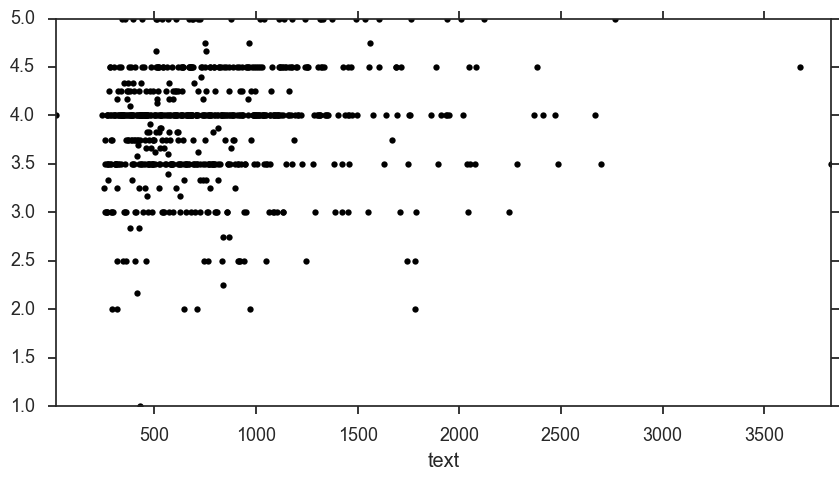

In [57]:
df.groupby(df.text.str.len()).review_overall.mean().plot(style='.k', figsize=(10, 5))

<div class="alert alert-info">
  <b>Bonus exercise</b>
</div>

- Try grouping by the number of words
- Try grouping by the number of sentences

_Hint_: `str.count` accepts a regular expression...

### Example

Which **brewer** (`brewer_id`) has the largest gap between the min and max `review_overall` for two of their beers?

_Hint_: You'll need to do this in two steps:
    1. Find the average `review_overall` by `brewer_id` and `beer_name`.
    2. Find the difference between the max and min by brewer (rembember `.groupby(level=)`)

In [58]:
avg = (df.groupby(['brewer_id', 'beer_name'])
       .review_overall
       .mean())
avg

brewer_id  beer_name                  
3          Pecan Harvest Ale              4.0
4          Allagash Burnham Road          4.0
           Allagash Dubbel Ale            3.5
           Allagash Hugh Malone           4.0
           Allagash Interlude             3.5
                                         ... 
20729      37hr Simcoe SMaSH              4.0
21239      Schanzenbräu Schwarzbier       3.5
21243      Harry's Pale Ale               3.5
23058      Hoppy Dog                      2.0
23980      Yuengling Traditional Lager    4.5
Name: review_overall, dtype: float64

In [59]:
extrema = avg.groupby(level='brewer_id').agg(['min', 'max'])
extrema

,min,max
brewer_id,,
3,4.0,4.0
4,3.5,4.5
8,4.5,4.5
22,4.0,4.0
24,4.5,4.5
...,...,...
20729,4.0,4.0
21239,3.5,3.5
21243,3.5,3.5


In [60]:
difference = extrema['max'] - extrema['min']
difference.sort_values(ascending=False)

brewer_id
1805     3.000000
1141     2.500000
113      2.500000
35       2.333333
13371    2.000000
           ...   
2089     0.000000
2097     0.000000
2099     0.000000
2171     0.000000
3        0.000000
dtype: float64

### Example

Create a more aggregated "kind" of beer, less detailed than `style`

In [61]:
style = df.beer_style.str.lower()
style.head()

0                    american stout
1                   american porter
2                   german pilsener
3    american double / imperial ipa
4           american pale ale (apa)
Name: beer_style, dtype: object

In [62]:
kinds = ['ipa', 'apa', 'amber ale', 'rye', 'scotch', 'stout', 'barleywine', 'porter', 'brown ale', 'lager', 'pilsner',
         'tripel', 'biter', 'farmhouse', 'malt liquour', 'rice']

In [63]:
expr = '|'.join(['(?P<{name}>{pat})'.format(pat=kind, name=kind.replace(' ', '_')) for kind in kinds])
expr

'(?P<ipa>ipa)|(?P<apa>apa)|(?P<amber_ale>amber ale)|(?P<rye>rye)|(?P<scotch>scotch)|(?P<stout>stout)|(?P<barleywine>barleywine)|(?P<porter>porter)|(?P<brown_ale>brown ale)|(?P<lager>lager)|(?P<pilsner>pilsner)|(?P<tripel>tripel)|(?P<biter>biter)|(?P<farmhouse>farmhouse)|(?P<malt_liquour>malt liquour)|(?P<rice>rice)'

In [64]:
beer_kind = (style.replace({'india pale ale': 'ipa',
                            'american pale ale': 'apa'})
            .str.extract(expr, expand=False).fillna('').sum(1)
            .str.lower().replace('', 'other'))
beer_kind.head()

0     stout
1    porter
2     other
3       ipa
4       apa
dtype: object

In [69]:
df.groupby(beer_kind).review_overall.mean().sort_values(ascending=False).head()

farmhouse    4.060000
ipa          4.009677
porter       4.000000
stout        3.986239
tripel       3.970588
Name: review_overall, dtype: float64

In [70]:
df.groupby(['brewer_id', beer_kind]).review_overall.mean()

brewer_id           
3          brown ale    4.000000
4          ipa          4.000000
           other        3.666667
           tripel       4.500000
8          apa          4.500000
                          ...   
20729      ipa          4.000000
21239      other        3.500000
21243      apa          3.500000
23058      apa          2.000000
23980      lager        4.500000
Name: review_overall, dtype: float64

Finding the number of beers of each kind by brewer:

In [72]:
df.groupby(['brewer_id', beer_kind]).beer_id.nunique().unstack(1).fillna(0).head()

,apa,barleywine,brown ale,farmhouse,ipa,lager,other,pilsner,porter,rye,scotch,stout,tripel
brewer_id,,,,,,,,,,,,,
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We've seen a lot of permutations among number of groupers, number of columns to aggregate, and number of aggregators.


In fact, the `.agg`, which returns one row per group, is just one kind of way to combine the results. The three ways are

- `agg`: one row per results
- `transform`: identically shaped output as input
- `apply`: anything goes

### Transform

Combined `Series`/`DataFrame` is the same shape as the input. 

For example, say you want to standardize the reviews by subtracting the mean.

In [77]:
df.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


In [79]:
def de_mean(reviews):
    s = reviews - reviews.mean()
    return s

In [74]:
de_mean(df.review_overall)

0      0.652653
1      0.652653
2     -0.847347
3      0.152653
4      0.152653
         ...   
994   -0.347347
995    1.152653
996   -1.347347
997   -0.347347
998   -0.847347
Name: review_overall, dtype: float64

We can do this at the *person* level with `groupby` and `transform`.

In [86]:
df['review_overall_demeaned'] = df.groupby('profile_name').review_overall.transform(de_mean)

This uses the *group* means instead of the overall means

In [87]:
df[['profile_name','review_overall','review_overall_demeaned']].sort_values('profile_name').head(10)

,profile_name,review_overall,review_overall_demeaned
140,05Harley,4.0,0.0000
461,ADZA,3.5,0.0000
23,ALeF,5.0,0.0000
789,ATPete,3.0,-0.8125
855,ATPete,2.5,-1.3125
851,ATPete,4.0,0.1875
819,ATPete,4.5,0.6875
808,ATPete,4.0,0.1875
802,ATPete,4.0,0.1875
773,ATPete,5.0,1.1875


## Apply

- `.apply()` can return all sorts of things, doesn't have to be the same shape...
- Lots of uses, too many to go into...

In [98]:
def something(x):
    return x['review_appearance'].max() - x['review_aroma'].min()

In [99]:
df.groupby('beer_style').apply(something)

beer_style
Altbier                       1.0
American Adjunct Lager        2.5
American Amber / Red Ale      3.0
American Amber / Red Lager    2.5
American Barleywine           1.5
                             ... 
Tripel                        1.5
Vienna Lager                  1.5
Weizenbock                    0.5
Wheatwine                     0.5
Witbier                       2.0
dtype: float64

Or more succinctly as a `lambda` function:

In [100]:
df.groupby('beer_style').apply(lambda x: x['review_appearance'].max() - x['review_aroma'].min())

beer_style
Altbier                       1.0
American Adjunct Lager        2.5
American Amber / Red Ale      3.0
American Amber / Red Lager    2.5
American Barleywine           1.5
                             ... 
Tripel                        1.5
Vienna Lager                  1.5
Weizenbock                    0.5
Wheatwine                     0.5
Witbier                       2.0
dtype: float64

## References

Slide materials inspired by and adapted from [Chris Fonnesbeck](https://github.com/fonnesbeck/statistical-analysis-python-tutorial) and [Tom Augspurger](https://github.com/TomAugspurger/pydata-chi-h2t)